# SymPy examples

sources:
http://docs.sympy.org/latest/tutorial/
http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/notebooks/SymPy%20Examples.ipynb

In [10]:
from __future__ import division
import sympy as sym
# make things look pretty in the notebook
from sympy import init_session

import math

SymPy provides support for symbolic math to python, similar to what you would do with Mathematica or Maple.  The major difference is that it acts just like any other python module, so you can use the symbolic math together in your own python projects with the rest of python functionality.

In [11]:
init_session()

IPython console for SymPy 1.6 (Python 3.8.3-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6/



## SymPy types and basic symbolic manipulation

Sympy defines its own types, you can convert them to python types, but you don't always want to (and will probably lose accuracy when you do).  

In [12]:
print(math.sqrt(2))

1.4142135623730951


In [13]:
print(sym.sqrt(2))

sqrt(2)


In [14]:
print(sym.sqrt(8))

2*sqrt(2)


In [15]:
help(sym.sqrt(8))

Help on Mul in module sympy.core.mul object:

class Mul(sympy.core.expr.Expr, sympy.core.operations.AssocOp)
 |  Mul(*args, **options)
 |  
 |  Base class for algebraic expressions.
 |  
 |  Everything that requires arithmetic operations to be defined
 |  should subclass this class, instead of Basic (which should be
 |  used only for argument storage and expression manipulation, i.e.
 |  pattern matching, substitutions, etc).
 |  
 |  See Also
 |  ========
 |  
 |  sympy.core.basic.Basic
 |  
 |  Method resolution order:
 |      Mul
 |      sympy.core.expr.Expr
 |      sympy.core.operations.AssocOp
 |      sympy.core.basic.Basic
 |      sympy.core.evalf.EvalfMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __neg__(self)
 |  
 |  as_base_exp(self)
 |  
 |  as_coeff_Mul(self, rational=False)
 |      Efficiently extract the coefficient of a product.
 |  
 |  as_coeff_mul(self, *deps, **kwargs)
 |      Return the tuple (c, args) where self is written as a Mul, ``m``.
 

We can do symbolic math not just on numbers, but we can tell SymPy what to treat as a symbol, using `symbols()`

In [16]:
from sympy import symbols
x, y, z = sym.symbols("x y z")

In [17]:
expr = x + 2*y
expr

In [18]:
expr - 1

In [19]:
expr - y

In [20]:
f = x*expr
f

In [21]:
g = sym.expand(f)
g

In [22]:
sym.factor(g)

## substitution

SymPy provides methods to substitute values for symbols in symbolic expressions.  Note, the follow likely does not do what you expect:

In [23]:
expr = sin(z*2*pi)
z = 0
expr

We've now redefined `z` to be a python type

In [24]:
type(z)

int

to do substitution, we use the `subs()` method

In [25]:
expr = sin(x*2*pi)
expr

In [26]:
a = expr.subs(x, 0.125)
a

Note that this is not a floating point number -- it is still a SymPy object.  To make it floating point, we can use evalf()

In [27]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


This is still a SymPy object, because SymPy can do arbitrary precision 

In [28]:
a.evalf(100)

want regular python types?

In [29]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


## Python and SymPy

In [30]:
x, y, z, t = symbols('x y z t')

SymPy symbols are just objects and when you do operations on two sympy objects the result is a sympy object.  

When you combine a sympy and python object, the result is also a sympy object.  

But we need to be careful when doing fractions.  For instance doing `x + 1/3` will first compute `1/3` in python (giving `0` or `0.333...` depending on the division operator) and then add it to the sympy `x` symbol.  The `Rational()` function makes this all happen in sympy

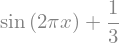

In [31]:
f = expr + Rational(1,3)
f

In [32]:
expr + 1/3

## equality

`=` is still the assignment operator of python (it does not mean symbolic equality), and `==` is still the logical test (exact structural equality).  There is a separate object, `Eq()` to specify symbolic equality.

And testing for _algebraic_ equality is not always accomplished using `==`, since that tests for _structural equality_.

In [33]:
x + 1 == 4

False

In [34]:
Eq(x + 1, 4)

In [35]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [36]:
a == b

False

We can use `simplify()` to test for algebraic equality

In [37]:
simplify(a - b)

In [38]:
a = cos(x) + I*sin(x)
a

In [39]:
simplify(a)

## More substitution

note that substitution returns a new expression: SymPy expressions are immutable

In [40]:
expr = cos(x)
expr.subs(x, 0)

In [41]:
expr

In [42]:
x

multiple substitutions, pass a list of tuples

In [43]:
expr = x**3 + 4*x*y - z
expr

In [44]:
expr.subs([(x, 2), (y, 4), (z, 0)])

## simplifying

There is not unique definition of what the simplest form of an expression is.

`simplify()` tries lots of methods for simplification

In [45]:
simplify(sin(x)**2 + cos(x)**2)

In [46]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

In [47]:
simplify(gamma(x)/gamma(x - 2))

but sometimes it doesn't have your idea of what the simplest form is

In [48]:
simplify(x**2 + 2*x + 1)

instead factor may be what you want

In [49]:
factor(x**2 + 2*x + 1)

### polynomial simplification

In [50]:
expand((x + 1)**2)

In [51]:
expand((x + 2)*(x - 3))

In [52]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

In [53]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [54]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

collect collects common powers

In [55]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [56]:
collected_expr = collect(expr, x)
collected_expr

cancel cancels

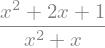

In [57]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

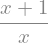

In [58]:
cancel(a)

trigsimp simplifies trigonometric identities

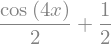

In [59]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [60]:
trigsimp(sin(x)*tan(x)/sec(x))

the tutorial discusses some of the nuances of simplification of powers and special functions

## Calculus

Calculus operations are simple in SymPy

### derivatives

In [61]:
diff(cos(x), x)

In [62]:
diff(exp(x**2), x)

third derivative

In [63]:
diff(x**4, x, 3)

differentiate different variables

In [64]:
expr = exp(x*y*z)
diff(expr, x, y, z)

unevaluated derivaties can be useful for building up ODEs and PDEs

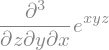

In [65]:
deriv = Derivative(expr, x, y, z)
deriv

In [66]:
deriv.doit()

### integrals

definite and indefinite integrals are supported

In [67]:
integrate(cos(x), x)

definite integral -- note the construction of the infinity

In [68]:
integrate(exp(-x), (x, 0, oo))

double integral

In [69]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

if it is unable to do the integral, it returns an Integral object

Integral(x**x, x)


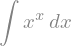

In [70]:
expr = integrate(x**x, x)
print(expr)
expr

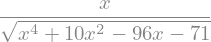

In [71]:
a = x / sqrt(x**4 + 10*x**2 - 96*x - 71)   # example from Wikipedia Risch algorithm page)
a

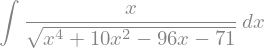

In [72]:
integrate(a, x)     # this has a known solution, but SymPy fails to find it

### limits

In [73]:
limit(sin(x)/x, x, 0)

### series expansions

In [74]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)

In [75]:
print(a)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + 31*x**8/5760 + x**9/5670 + O(x**10)


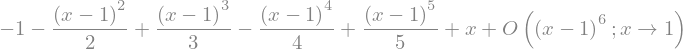

In [76]:
c = log(x).series(x, x0=1, n=6)
c

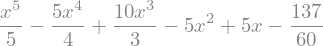

In [77]:
simplify(c.removeO())

## solvers

`solveset()` is the main interface to solvers in SymPy.  Note that it used to be `solve()`, but this has been replaced (see http://docs.sympy.org/latest/modules/solvers/solveset.html)

If no Eq() is done, then it is assumed to be equal to 0

In [78]:
solveset(x**2 - x, x)

you can restrict the domain of the solution (e.g. to reals).  Recall that Z is the set of integers

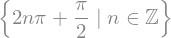

In [79]:
solveset(sin(x) - 1, x, domain=S.Reals)

### linear systems

`linsolve()` is the interface to linear systems

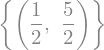

In [80]:
linsolve([x - y + 2, x + y - 3], [x, y])

In [81]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

roots will report if a solution is multiple by listing it multiple times

In [82]:
roots(x**3 - 6*x**2 + 9*x, x)

0 is 1 root, and 3 is 2 more roots

### Differential equations

you need an undefined function (f and g already are by our init_session() above, but we've probably reset these

In [83]:
f, g = symbols('f g', cls=Function)

In [84]:
f(x)

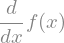

In [85]:
f(x).diff(x)

In [86]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

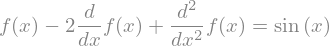

In [87]:
diffeq

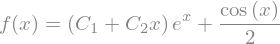

In [88]:
dsolve(diffeq, f(x))

### Matrices

consider the Euler equations:

$$q_t + A(q) q_x = 0$$

where

$$q = \left ( \begin{array}{c} \rho \\ u \\ p \end{array} \right )
\qquad
A(q) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & c^2 \rho & u \end{array} \right ) $$



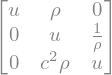

In [89]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')
A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

In [90]:
A.row(0)

The eigenvalues of the system are the speeds at which information propagates

In [91]:
A.eigenvals()

You can diagonalize it, such that
$$ A = PDP^{-1}$$

In [92]:
P, D = A.diagonalize()

$D$ will be a matrix of the eigenvalues

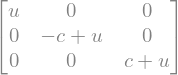

In [93]:
D

$P$ will be the matrix of right eigenvectors

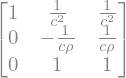

In [94]:
P

Inverse

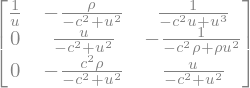

In [95]:
A**-1